# Barbie Reviews - Sentiment Analysis

The dataset file named barbie_reviews.csv contains 1024 user reviews for the movie "Barbie" scraped from the IMDB website. The dataset is divided into three feature classes:

* title - user review's title
* rating - user's rating for the movie
* content - user review content

## Data Preprocessing

### Data loading

In [2]:
import pandas as pd
df = pd.read_csv('barbie_reviews.csv', index_col=0)

### Overview of the dataset

In [3]:
df

,title,rating,content
0,"Beautiful film, but so preachy",6/10,"Margot does the best with what she's given, bu..."
1,"As a guy I felt some discomfort, and that's ok.",10/10,As much as it pains me to give a movie called ...
2,Well this really did come as a surprise.,8/10,"It pains me to say it, but I enjoyed this movi..."
3,Could Have Been Great. 2nd Half Brings It Down.,6/10,"The quality, the humor, and the writing of the..."
4,Barbie Is A Weirdly Fun Movie!,8/10,"8.5/10\nWhile i'm not so sure at first, the mo..."
...,...,...,...
1019,It's good for an evening with popcorn in front...,4/10,Going to the cinema is a waste of money if you...
1020,Wasn't going in expecting much,9/10,For a girl who grew up playing with Barbies wa...
1021,THOROUGHLY ENJOYED,8/10,"Loved it loved it loved it.It's so funny, i wa..."
1022,#justiceforken,8/10,Okay I thoroughly enjoyed this movie. It's fun...


### Data structure

Size of the dataset and the number of objects.

In [4]:
df.shape

(1024, 3)

In [5]:
len(df)

1024

There are 3 features in the dataset:

In [6]:
df.columns

Index(['title', 'rating', 'content'], dtype='object')

Datatypes of the features:

In [7]:
df.dtypes

title      object
rating     object
content    object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1024 entries, 0 to 1023
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    1024 non-null   object
 1   rating   1007 non-null   object
 2   content  1024 non-null   object
dtypes: object(3)
memory usage: 32.0+ KB


### Data cleaning

Checking for duplicates:

In [9]:
df.duplicated(keep='first').sum()

0

Checking for null values:

In [10]:
df.isna().sum()

title       0
rating     17
content     0
dtype: int64

Number of null values in "rating" column is 17. Let's drop these rows:

In [11]:
df = df.dropna(subset=['rating'])

df.isna().sum()


title      0
rating     0
content    0
dtype: int64

We have a feature "rating" in our dataset, which contains ratings on a 10-point scale, but it is currently represented as an object type (because of the "/10" formatting). Let's remove the formatting and convert the feature to a numeric type:

In [12]:
df.rating.unique()

array(['6/10', '10/10', '8/10', '3/10', '9/10', '5/10', '4/10', '7/10',
       '1/10', '2/10'], dtype=object)

In [13]:
df.loc[:,'rating'] = df['rating'].str.replace('/10','')
df.rating.unique()

array(['6', '10', '8', '3', '9', '5', '4', '7', '1', '2'], dtype=object)

In [14]:
df.loc[:,'rating'] = df['rating'].astype('int')

Let's check the datatypes of the features again:

In [15]:
df.dtypes

title      object
rating     object
content    object
dtype: object

## Text preprocessing

First, let's investigate some of the characteristics and the distribution of the ratings.

In [16]:
df

,title,rating,content
0,"Beautiful film, but so preachy",6,"Margot does the best with what she's given, bu..."
1,"As a guy I felt some discomfort, and that's ok.",10,As much as it pains me to give a movie called ...
2,Well this really did come as a surprise.,8,"It pains me to say it, but I enjoyed this movi..."
3,Could Have Been Great. 2nd Half Brings It Down.,6,"The quality, the humor, and the writing of the..."
4,Barbie Is A Weirdly Fun Movie!,8,"8.5/10\nWhile i'm not so sure at first, the mo..."
...,...,...,...
1019,It's good for an evening with popcorn in front...,4,Going to the cinema is a waste of money if you...
1020,Wasn't going in expecting much,9,For a girl who grew up playing with Barbies wa...
1021,THOROUGHLY ENJOYED,8,"Loved it loved it loved it.It's so funny, i wa..."
1022,#justiceforken,8,Okay I thoroughly enjoyed this movie. It's fun...


In [17]:
df['rating'].describe()

count     1007
unique      10
top         10
freq       260
Name: rating, dtype: int64

The average rating is 7/10. Median rating is 8/10. Let's visualize the distribution.

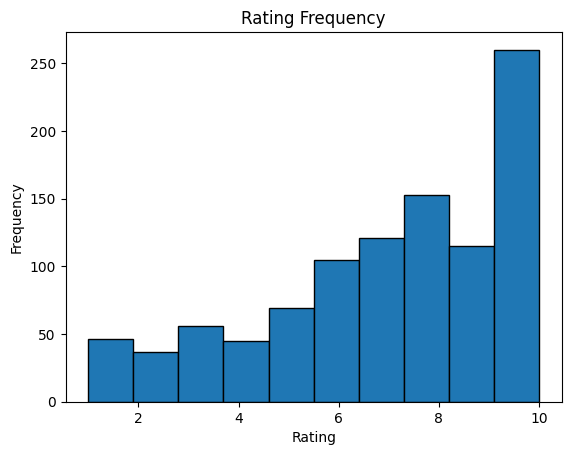

In [18]:
import matplotlib.pyplot as plt

df['rating'].plot(kind='hist',bins = 10, edgecolor='black')
plt.title('Rating Frequency')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


The distribution is skewed left and the movie has gained mostly positive ratings.

Let's investigate the number of words in the title and in the review content.

In [19]:
pd.options.mode.chained_assignment = None  # default='warn'
df['word_count_title']=df['title'].apply(lambda x: len(str(x).split(" ")))
df['word_count_content']=df['content'].apply(lambda x: len(str(x).split(" ")))

Median Word Count: 5.0


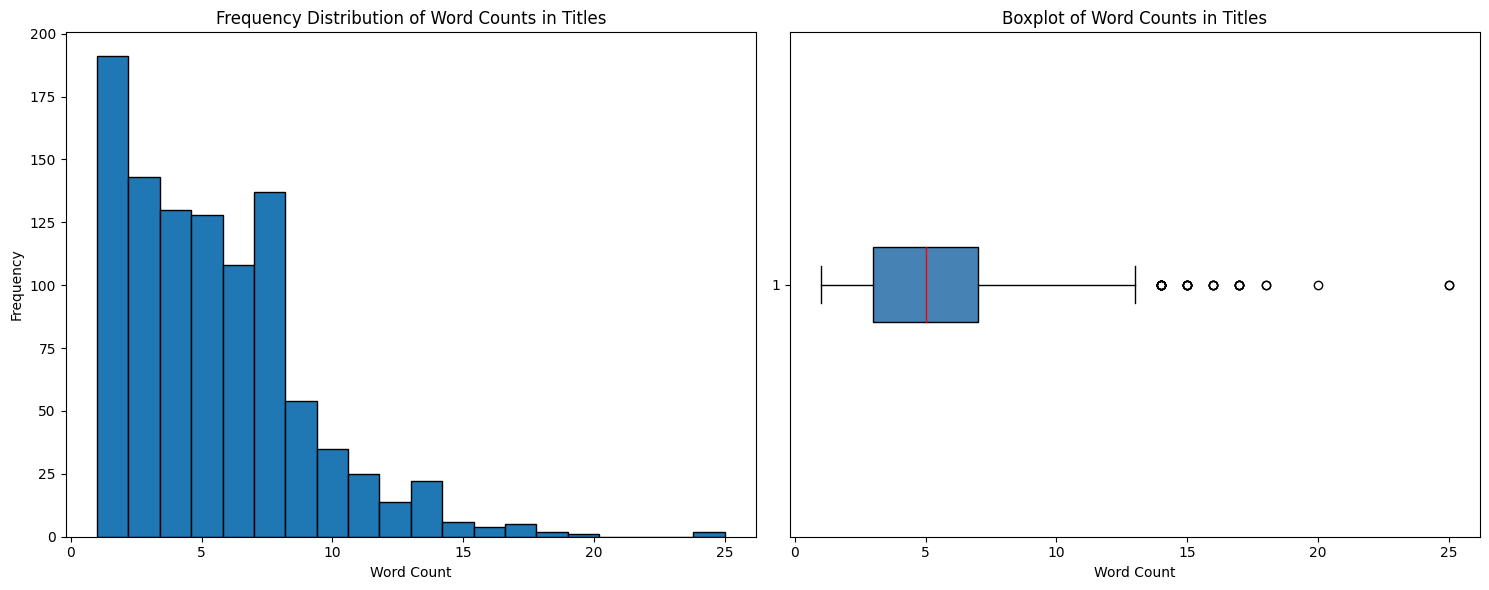

In [20]:
import matplotlib.pyplot as plt

# Calculating the median word count
median_word_count = df['word_count_title'].median()
print(f"Median Word Count: {median_word_count}")

# Setting up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Histogram on the first subplot
ax[0].hist(df['word_count_title'], bins=20, edgecolor='black')
ax[0].set_title('Frequency Distribution of Word Counts in Titles')
ax[0].set_xlabel('Word Count')
ax[0].set_ylabel('Frequency')

# Boxplot on the second subplot
bp = ax[1].boxplot(df['word_count_title'], vert=False, patch_artist=True,medianprops={'color': 'red', 'linewidth': 1})
for box in bp['boxes']:
    # Change outline color
    box.set(color='black', linewidth=1)
    # Change fill color
    box.set(facecolor='steelblue')
ax[1].set_title('Boxplot of Word Counts in Titles')
ax[1].set_xlabel('Word Count')

plt.tight_layout()  # Adjusts the subplots to fit into the figure area
plt.show()



Like we can assume, the titles are short and the distribution is right-skewed. Median words count is 5.

Median Word Count: 146.0


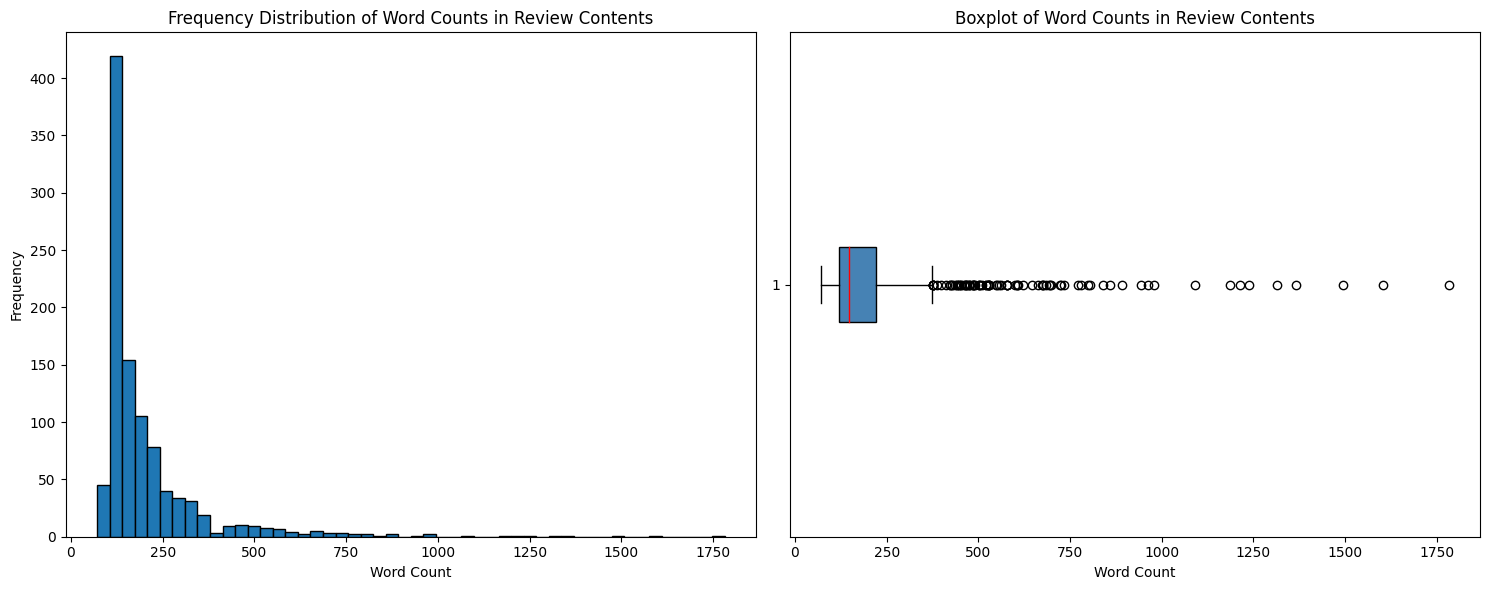

In [21]:
import matplotlib.pyplot as plt

# Calculating the median word count
median_word_count = df['word_count_content'].median()
print(f"Median Word Count: {median_word_count}")

# Setting up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Histogram on the first subplot
ax[0].hist(df['word_count_content'], bins=50, edgecolor='black')
ax[0].set_title('Frequency Distribution of Word Counts in Review Contents')
ax[0].set_xlabel('Word Count')
ax[0].set_ylabel('Frequency')

# Boxplot on the second subplot
bp = ax[1].boxplot(df['word_count_content'], vert=False, patch_artist=True,medianprops={'color': 'red', 'linewidth': 1})
for box in bp['boxes']:
    # Change outline color
    box.set(color='black', linewidth=1)
    # Change fill color
    box.set(facecolor='steelblue')
ax[1].set_title('Boxplot of Word Counts in Review Contents')
ax[1].set_xlabel('Word Count')

plt.tight_layout()  # Adjusts the subplots to fit into the figure area
plt.show()

The review contents are longer and the distribution is heavily right-skewed. Median word count in review content is 146.

Adding the title and review together and investigating the characteristics and the distribution of the combined data.

In [22]:
pd.options.mode.chained_assignment = None  # default='warn'
df['combined'] = df['title'] + " " + df['content']
df

,title,rating,content,word_count_title,word_count_content,combined
0,"Beautiful film, but so preachy",6,"Margot does the best with what she's given, bu...",5,144,"Beautiful film, but so preachy Margot does the..."
1,"As a guy I felt some discomfort, and that's ok.",10,As much as it pains me to give a movie called ...,10,242,"As a guy I felt some discomfort, and that's ok..."
2,Well this really did come as a surprise.,8,"It pains me to say it, but I enjoyed this movi...",8,175,Well this really did come as a surprise. It pa...
3,Could Have Been Great. 2nd Half Brings It Down.,6,"The quality, the humor, and the writing of the...",9,117,Could Have Been Great. 2nd Half Brings It Down...
4,Barbie Is A Weirdly Fun Movie!,8,"8.5/10\nWhile i'm not so sure at first, the mo...",6,282,Barbie Is A Weirdly Fun Movie! 8.5/10\nWhile i...
...,...,...,...,...,...,...
1019,It's good for an evening with popcorn in front...,4,Going to the cinema is a waste of money if you...,12,106,It's good for an evening with popcorn in front...
1020,Wasn't going in expecting much,9,For a girl who grew up playing with Barbies wa...,5,125,Wasn't going in expecting much For a girl who ...
1021,THOROUGHLY ENJOYED,8,"Loved it loved it loved it.It's so funny, i wa...",2,140,THOROUGHLY ENJOYED Loved it loved it loved it....
1022,#justiceforken,8,Okay I thoroughly enjoyed this movie. It's fun...,1,257,#justiceforken Okay I thoroughly enjoyed this ...


In [23]:
pd.options.mode.chained_assignment = None  # default='warn'
df['word_count_combined']=df['combined'].apply(lambda x: len(str(x).split(" ")))

Median Word Count: 151.0


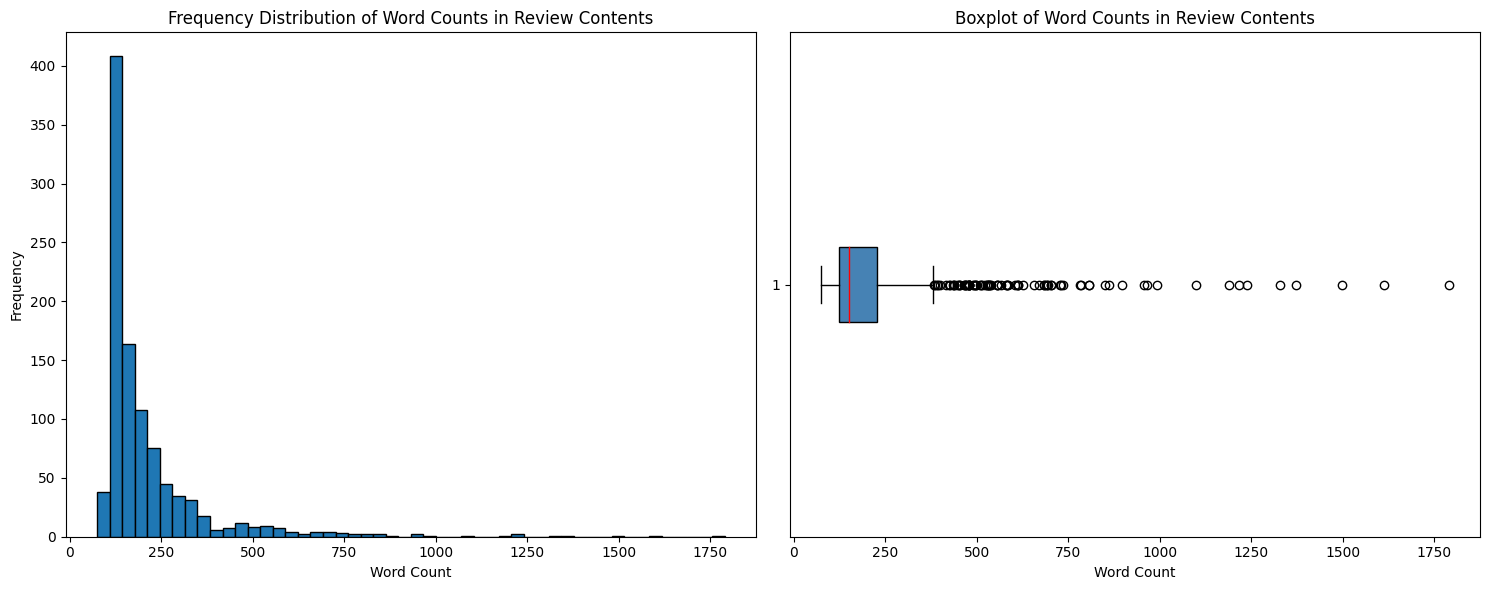

In [24]:
# Calculating the median word count
median_word_count = df['word_count_combined'].median()
print(f"Median Word Count: {median_word_count}")

# Setting up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Histogram on the first subplot
ax[0].hist(df['word_count_combined'], bins=50, edgecolor='black')
ax[0].set_title('Frequency Distribution of Word Counts in Review Contents')
ax[0].set_xlabel('Word Count')
ax[0].set_ylabel('Frequency')

# Boxplot on the second subplot
bp = ax[1].boxplot(df['word_count_combined'], vert=False, patch_artist=True,medianprops={'color': 'red', 'linewidth': 1})
for box in bp['boxes']:
    # Change outline color
    box.set(color='black', linewidth=1)
    # Change fill color
    box.set(facecolor='steelblue')
ax[1].set_title('Boxplot of Word Counts in Review Contents')
ax[1].set_xlabel('Word Count')

plt.tight_layout()  # Adjusts the subplots to fit into the figure area
plt.show()

The symmetry is still right-skewed. Median word count for the combined data is 151.

Let's investigate how many stopwords are in the data, using Gensim library with 337 stopwords.

In [25]:
import gensim
gensim_stopwords = gensim.parsing.preprocessing.STOPWORDS

In [26]:
stop = gensim_stopwords
stop

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [27]:
pd.options.mode.chained_assignment = None  # default='warn'
df['stopwords'] = df['combined'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['combined','stopwords']].head()

,combined,stopwords
0,"Beautiful film, but so preachy Margot does the...",74
1,"As a guy I felt some discomfort, and that's ok...",119
2,Well this really did come as a surprise. It pa...,78
3,Could Have Been Great. 2nd Half Brings It Down...,60
4,Barbie Is A Weirdly Fun Movie! 8.5/10\nWhile i...,138


Let's investigate the distribution of stopwords in our data and compare that with our total number of words.

Median Stop Word Count: 73.0


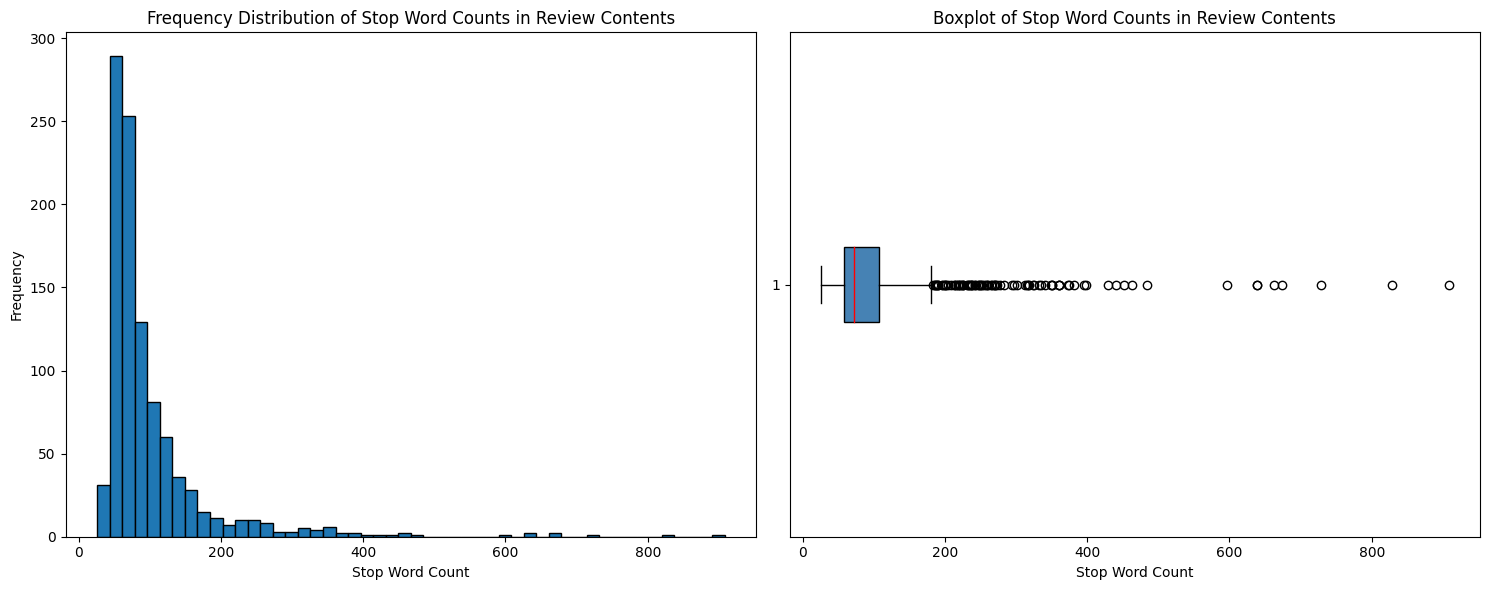

In [28]:
# Calculating the median word count
median_word_count = df['stopwords'].median()
print(f"Median Stop Word Count: {median_word_count}")

# Setting up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(15, 6))

# Histogram on the first subplot
ax[0].hist(df['stopwords'], bins=50, edgecolor='black')
ax[0].set_title('Frequency Distribution of Stop Word Counts in Review Contents')
ax[0].set_xlabel('Stop Word Count')
ax[0].set_ylabel('Frequency')

# Boxplot on the second subplot
bp = ax[1].boxplot(df['stopwords'], vert=False, patch_artist=True,medianprops={'color': 'red', 'linewidth': 1})
for box in bp['boxes']:
    # Change outline color
    box.set(color='black', linewidth=1)
    # Change fill color
    box.set(facecolor='steelblue')
ax[1].set_title('Boxplot of Stop Word Counts in Review Contents')
ax[1].set_xlabel('Stop Word Count')

plt.tight_layout()  # Adjusts the subplots to fit into the figure area
plt.show()

The distribution of stop word counts is also right-skewed. Median stop word count is 73.

Keskmine stopsõnade osa tekstis ühe sõna kohta: 0.47166446684826874


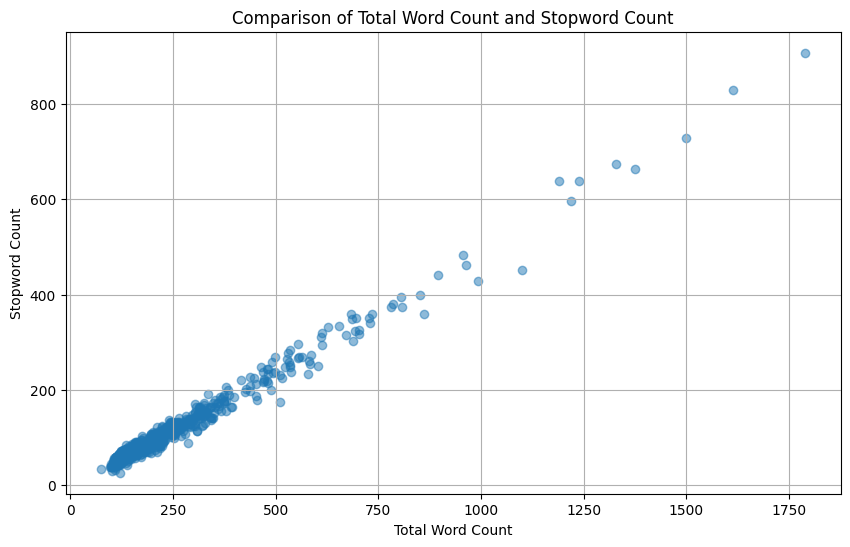

In [29]:
average_total_word_count = df['word_count_combined'].mean()
average_stopword_count = df['stopwords'].mean()
average_stopword_ratio = average_stopword_count / average_total_word_count
print(f"Keskmine stopsõnade osa tekstis ühe sõna kohta: {average_stopword_ratio}")

plt.figure(figsize=(10, 6))
plt.scatter(df['word_count_combined'], df['stopwords'], alpha=0.5)
plt.title('Comparison of Total Word Count and Stopword Count')
plt.xlabel('Total Word Count')
plt.ylabel('Stopword Count')
plt.grid(True)
plt.show()

Almost half of the words in the data are stopwords.

## Text cleaning

For further analysis and modelling we will remove punctuation, special symbols, redundant spaces and convert the text to lower case.

In [30]:
clean_content = df[['combined','rating']]

In [31]:
clean_content

,combined,rating
0,"Beautiful film, but so preachy Margot does the...",6
1,"As a guy I felt some discomfort, and that's ok...",10
2,Well this really did come as a surprise. It pa...,8
3,Could Have Been Great. 2nd Half Brings It Down...,6
4,Barbie Is A Weirdly Fun Movie! 8.5/10\nWhile i...,8
...,...,...
1019,It's good for an evening with popcorn in front...,4
1020,Wasn't going in expecting much For a girl who ...,9
1021,THOROUGHLY ENJOYED Loved it loved it loved it....,8
1022,#justiceforken Okay I thoroughly enjoyed this ...,8


Removing URLs:

In [32]:
clean_content.loc[:, 'combined'] = clean_content['combined'].str.replace(r"http\S+", "")
clean_content.loc[:, 'combined'] = clean_content['combined'].str.replace(r"http", "")

Removing e-mails:

In [33]:
clean_content['combined'] = clean_content['combined'].str.replace(r"\S*@\S*\s?", "")

All symbols that are not characters, symbols or apostrophies are replaced with space:

In [34]:
clean_content['combined'] = clean_content['combined'].str.replace(r"[^A-Za-z0-9\']", " ")

Removing numbers:

In [35]:
clean_content['combined'] = clean_content['combined'].astype(str).str.replace(r"\d+", "", regex=True)

Removing redundant spaces:

In [36]:
clean_content[ 'combined'] = clean_content['combined'].str.replace(r"\s+", " ",regex=True)

Converting to lower case:

In [37]:
clean_content[ 'combined'] = clean_content['combined'].str.lower()

In [38]:
clean_content

,combined,rating
0,"beautiful film, but so preachy margot does the...",6
1,"as a guy i felt some discomfort, and that's ok...",10
2,well this really did come as a surprise. it pa...,8
3,could have been great. nd half brings it down....,6
4,barbie is a weirdly fun movie! ./ while i'm no...,8
...,...,...
1019,it's good for an evening with popcorn in front...,4
1020,wasn't going in expecting much for a girl who ...,9
1021,thoroughly enjoyed loved it loved it loved it....,8
1022,#justiceforken okay i thoroughly enjoyed this ...,8


Checking the result:

In [39]:
print(clean_content['combined'].apply(lambda x: len([x for x in x.split() if 'http' in x])).sum())
print(clean_content['combined'].apply(lambda x: len([x for x in x.split() if '@' in x])).sum())
print(clean_content['combined'].apply(lambda x: len([x for x in x.split() if '#' in x])).sum())
print(clean_content['combined'].apply(lambda x: len([x for x in x.split() if x.isupper()])).sum())

0
1
9
0


Removing stopwords, using remove_stopwords function from Gensim library.

In [40]:
from gensim.parsing.preprocessing import remove_stopwords

# Applying Gensim's remove_stopwords function to each row in the 'combined' column
clean_content['combined'] = clean_content['combined'].apply(lambda x: remove_stopwords(x))

In [41]:
clean_content

,combined,rating
0,"beautiful film, preachy margot best she's give...",6
1,"guy felt discomfort, that's ok. pains movie ca...",10
2,"come surprise. pains it, enjoyed movie expecti...",8
3,"great. nd half brings down. quality, humor, wr...",6
4,"barbie weirdly fun movie! ./ i'm sure first, m...",8
...,...,...
1019,it's good evening popcorn tv going cinema wast...,4
1020,wasn't going expecting girl grew playing barbi...,9
1021,thoroughly enjoyed loved loved loved it.it's f...,8
1022,#justiceforken okay thoroughly enjoyed movie. ...,8


Checking whether there are any stopwords left:

In [42]:
from gensim.parsing.preprocessing import STOPWORDS

def contains_stopwords(text):
    return any(word.lower() in STOPWORDS for word in str(text).split())

# Applying the function to check for stopwords
clean_content['contains_stopwords'] = clean_content['combined'].apply(contains_stopwords)

# Checking if any row still contains stopwords
any_stopwords_left = clean_content['contains_stopwords'].any()

print(f"Are there any stopwords left in the data? {any_stopwords_left}")

Are there any stopwords left in the data? False


Checking the most frequent words in the data:

In [43]:
freq = pd.Series(' '.join(clean_content['combined']).split()).value_counts()[:20]
freq

movie      2305
barbie     1897
film       1029
it's        936
like        754
good        578
world       477
great       448
fun         443
ryan        428
robbie      416
real        414
ken         413
margot      412
gosling     386
think       385
women       332
-           332
movie.      330
watch       306
Name: count, dtype: int64

Adding more words to stopwords:
* movie
* barbie
* film
* it's
* world
* ken
* gosling
* robbie
* margot
* ryan
* real
* women
* movie.
* -
* think
* watch

Also let' check and add the least frequent words to stopwords:

In [44]:
freq = pd.Series(' '.join(clean_content['combined']).split()).value_counts()[-20:]
freq

partner,         1
quell            1
skepticism       1
surfaced         1
favor,           1
reservations,    1
frank,           1
abrasive         1
alarmist         1
erased           1
apoplectic,      1
unreasonable.    1
suffice          1
breath-taking    1
tipping          1
'barbie,'        1
chance,"         1
must-see.        1
have?            1
topping          1
Name: count, dtype: int64

In [45]:
from gensim.parsing.preprocessing import STOPWORDS

# Define your list of custom stopwords
custom_stopwords = {'movie', 'barbie', 'film', 'it\'s', 'world', 'ken', 'gosling', 'robbie', 'margot', 'ryan', 'real', 'women', 'movie.','think','-','watch'}
least_freq = set(freq.index)
custom_stopwords.update(least_freq)
# Add your custom stopwords to Gensim's stopwords
extended_stopwords = STOPWORDS.union(custom_stopwords)

In [46]:
def remove_extended_stopwords(text):
    return " ".join([word for word in str(text).split() if word.lower() not in extended_stopwords])

# Applying the function to each row in the 'combined' column
clean_content['combined'] = clean_content['combined'].apply(remove_extended_stopwords)

Repeat the process.

In [47]:
freq = pd.Series(' '.join(clean_content['combined']).split()).value_counts()[:20]
freq

like       754
good       578
great      448
fun        443
way        301
greta      300
don't      294
didn't     274
story      274
people     272
lot        266
little     265
message    262
movie,     261
gerwig     261
it.        256
perfect    241
i'm        239
funny      239
time       238
Name: count, dtype: int64

In [48]:
least_freq = pd.Series(' '.join(clean_content['combined']).split()).value_counts()[-20:]
least_freq

bewitching        1
stunts,           1
garnish           1
congratulated;    1
glee              1
advance           1
huge,             1
concrete          1
rich,             1
gills             1
varied,           1
finish;           1
shrewdly          1
penned            1
done?             1
flawless,         1
discrete          1
stuffed           1
proverbial        1
commentative.     1
Name: count, dtype: int64

Adding more words to stopwords:
* way
* greta
* don't
* didn't
* story
* people
* lot
* little
* message
* movie,
* gerwig
* it.
* i'm
* time

In [49]:
custom_stopwords = {'way', 
                    'greta',
                    'don\'t', 
                    'didn\'t',
                    'people', 
                    'lot', 
                    'little', 
                    'message',
                    'movie,',
                    'gerwig',
                    'it.',
                    'cast',
                    'i\'m',
                    'time'
                    }
least_freq = set(least_freq.index)
custom_stopwords.update(least_freq)
# Add your custom stopwords to Gensim's stopwords
extended_stopwords = STOPWORDS.union(custom_stopwords)
clean_content['combined'] = clean_content['combined'].apply(remove_extended_stopwords)

And let's do this one more time:

In [50]:
freq = pd.Series(' '.join(clean_content['combined']).split()).value_counts()[:20]
freq

like       754
good       578
great      448
fun        443
story      274
perfect    241
funny      239
men        229
feel       227
best       223
felt       217
going      217
thought    212
movies     197
love       195
loved      192
bit        190
know       176
life       170
want       168
Name: count, dtype: int64

In [51]:
least_freq = pd.Series(' '.join(clean_content['combined']).split()).value_counts()[-20:]
least_freq

stupendously     1
regard.          1
blast,           1
widely           1
prominently,     1
spellbinding,    1
compelling,      1
indeed.the       1
involvement      1
smarter          1
laughably        1
pleased,         1
riotous          1
(though,         1
certainly).      1
complement       1
mindfulness      1
backhanded,      1
wholehearted     1
stupidly         1
Name: count, dtype: int64

Adding more words:
* story
* men
* feel
* felt
* going
* thought
* movies
* bit
* know
* life
* want

In [52]:
custom_stopwords = {'story', 
                    'men',
                    'feel', 
                    'felt', 
                    'going', 
                    'thought', 
                    'movies', 
                    'bit',
                    'know',
                    'life',
                    'want'
                    }
least_freq = set(least_freq.index)
custom_stopwords.update(least_freq)
# Add your custom stopwords to Gensim's stopwords
extended_stopwords = STOPWORDS.union(custom_stopwords)
clean_content['combined'] = clean_content['combined'].apply(remove_extended_stopwords)

## Lemmatization

Let's use spaCy lemmatizer to lemmatize the data. SpaCy lemmatizer determines the POS (part-of-speech) of the lemma by default. The default spaCy model is 'en', which we will use here as well.

In [53]:
import spacy

nlp = spacy.load('en_core_web_sm')

def lemmatize_text(text):
    doc = nlp(text)
    return " ".join([token.lemma_ for token in doc])

clean_content['lemmatized'] = clean_content['combined'].apply(lemmatize_text)

In [54]:
clean_content.head()

,combined,rating,contains_stopwords,lemmatized
0,"beautiful film, preachy best she's given, disa...",6,False,"beautiful film , preachy good she be give , di..."
1,"guy discomfort, that's ok. pains called ""barbi...",10,False,"guy discomfort , that be ok . pain call "" barb..."
2,"come surprise. pains it, enjoyed expecting to,...",8,False,"come surprise . pain it , enjoy expect to , mu..."
3,"great. nd half brings down. quality, humor, wr...",6,False,"great . nd half bring down . quality , humor ,..."
4,"weirdly fun movie! ./ sure first, kept getting...",8,False,"weirdly fun movie ! ./ sure first , keep get f..."


We can see that the lemmatizer has partly done its job. For example, the word "best" has been lemmatized to "good". On the other hand, word "weirdly" has remained the same.

## Tokenization

We are using spaCy tokenizer to tokenize the data.

In [55]:
def tokenize(text):
    doc = nlp(text)
    return [token.text for token in doc]

clean_content['tokens'] = clean_content['lemmatized'].apply(tokenize)

In [56]:
clean_content.head()

,combined,rating,contains_stopwords,lemmatized,tokens
0,"beautiful film, preachy best she's given, disa...",6,False,"beautiful film , preachy good she be give , di...","[beautiful, film, ,, preachy, good, she, be, g..."
1,"guy discomfort, that's ok. pains called ""barbi...",10,False,"guy discomfort , that be ok . pain call "" barb...","[guy, discomfort, ,, that, be, ok, ., pain, ca..."
2,"come surprise. pains it, enjoyed expecting to,...",8,False,"come surprise . pain it , enjoy expect to , mu...","[come, surprise, ., pain, it, ,, enjoy, expect..."
3,"great. nd half brings down. quality, humor, wr...",6,False,"great . nd half bring down . quality , humor ,...","[great, ., nd, half, bring, down, ., quality, ..."
4,"weirdly fun movie! ./ sure first, kept getting...",8,False,"weirdly fun movie ! ./ sure first , keep get f...","[weirdly, fun, movie, !, ./, sure, first, ,, k..."


Overview of the corpus

In [57]:
all_words = [word for tokens in clean_content['tokens'] for word in tokens]
sentence_lengths = [len(tokens) for tokens in clean_content['tokens']]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

113596 words total, with a vocabulary size of 10371
Max sentence length is 880


## Word Frequencies

### Bag-of-words

C:\Users\meeli\AppData\Local\Temp\ipykernel_6908\4243943968.py:5: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


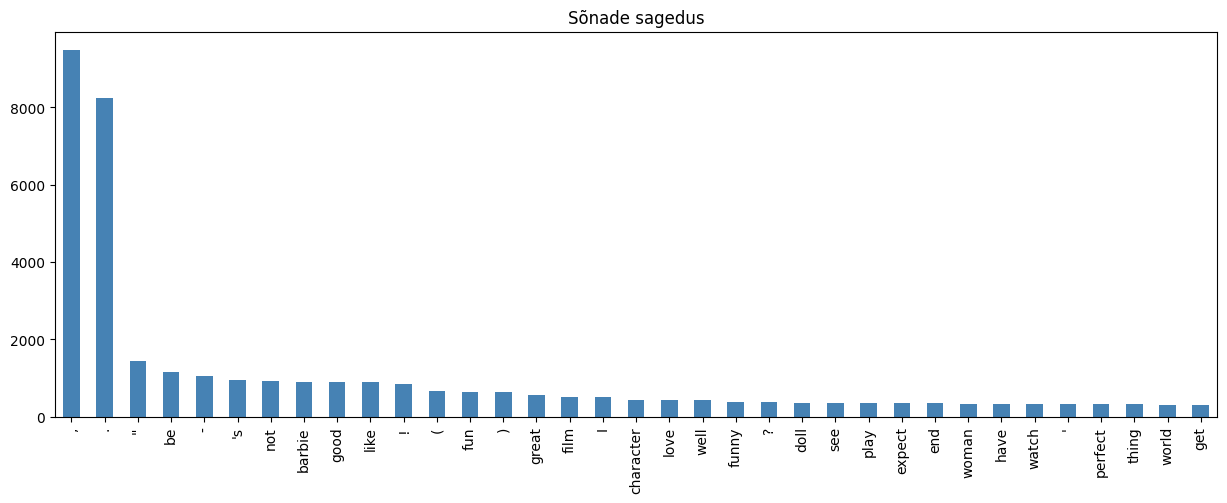

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
pd.Series(all_words).value_counts().head(35).plot(kind='bar', title="Sõnade sagedus", color="steelblue")

fig.tight_layout()
plt.show()

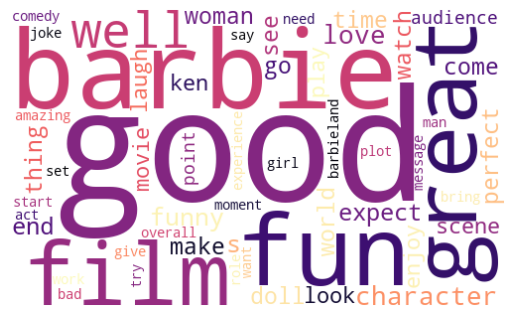

In [59]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = " ".join(all_words)

wc = WordCloud(width = 500, height = 300, background_color = "white", max_words = 55,
               colormap = "magma") #max_font_size = 70, min_font_size = 10
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

### Document-term Matrix based on BOW

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
term_doc_matrix = vectorizer.fit_transform(clean_content['lemmatized'].tolist())

In [61]:
vectorizer.get_feature_names_out()

array(['aaron', 'ab', 'aback', ..., 'zone', 'zoolander', 'zs'],
      dtype=object)

In [62]:
print(vectorizer.get_feature_names_out())
print(term_doc_matrix.toarray())

['aaron' 'ab' 'aback' ... 'zone' 'zoolander' 'zs']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [63]:
df_bow = pd.DataFrame(term_doc_matrix.toarray(), columns=vectorizer.get_feature_names_out())
df_bow

,aaron,ab,aback,abandon,abbatoir,abhor,ability,abit,able,abomination,...,zeitgeist,zellweger,zero,zerrrro,zestful,zizek,zoe,zone,zoolander,zs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
pd.concat([clean_content['lemmatized'].reset_index(drop=True), df_bow], axis=1)

,lemmatized,aaron,ab,aback,abandon,abbatoir,abhor,ability,abit,able,...,zeitgeist,zellweger,zero,zerrrro,zestful,zizek,zoe,zone,zoolander,zs
0,"beautiful film , preachy good she be give , di...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"guy discomfort , that be ok . pain call "" barb...",0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"come surprise . pain it , enjoy expect to , mu...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"great . nd half bring down . quality , humor ,...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"weirdly fun movie ! ./ sure first , keep get f...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,good evening popcorn tv cinema waste money mar...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1003,be not expect girl grow play barbie be not be ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,thoroughly enjoy love love love it.it 's funny...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1005,"# justiceforken okay thoroughly enjoy funny , ...",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Term Frequency, Inverse Document Frequency (TF-IDF)

In [65]:
tf = pd.DataFrame(zip(vectorizer.get_feature_names_out(),term_doc_matrix.toarray().sum(axis=0)),columns=['words','freq'])
tf.sort_values(by='freq', ascending=False)

,words,freq
662,be,1162
618,barbie,1036
4948,not,936
3166,good,908
4240,like,892
...,...,...
3814,insightfully,1
3805,ins,1
3804,inrpx,1
3793,inital,1


In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
transformer = TfidfVectorizer()
transformed_weights = transformer.fit_transform(clean_content['lemmatized'].tolist())
transformed_weights

<1007x8324 sparse matrix of type '<class 'numpy.float64'>'
	with 75149 stored elements in Compressed Sparse Row format>

In [67]:
transformer.get_feature_names_out()

array(['aaron', 'ab', 'aback', ..., 'zone', 'zoolander', 'zs'],
      dtype=object)

In [68]:
print(transformer.get_feature_names_out())
print(transformed_weights.toarray())

['aaron' 'ab' 'aback' ... 'zone' 'zoolander' 'zs']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [69]:
tf_idf = pd.DataFrame(transformed_weights.toarray(), columns=transformer.get_feature_names_out())
tf_idf

,aaron,ab,aback,abandon,abbatoir,abhor,ability,abit,able,abomination,...,zeitgeist,zellweger,zero,zerrrro,zestful,zizek,zoe,zone,zoolander,zs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.108118,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
pd.concat([clean_content['lemmatized'].reset_index(drop=True), tf_idf], axis=1)

,lemmatized,aaron,ab,aback,abandon,abbatoir,abhor,ability,abit,able,...,zeitgeist,zellweger,zero,zerrrro,zestful,zizek,zoe,zone,zoolander,zs
0,"beautiful film , preachy good she be give , di...",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"guy discomfort , that be ok . pain call "" barb...",0.0,0.0,0.0,0.0,0.0,0.0,0.108118,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"come surprise . pain it , enjoy expect to , mu...",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"great . nd half bring down . quality , humor ,...",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"weirdly fun movie ! ./ sure first , keep get f...",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,good evening popcorn tv cinema waste money mar...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003,be not expect girl grow play barbie be not be ...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1004,thoroughly enjoy love love love it.it 's funny...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,"# justiceforken okay thoroughly enjoy funny , ...",0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
import numpy as np

weights = np.asarray(transformed_weights.sum(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': transformer.get_feature_names_out(), 'weight': weights})
pd.options.display.float_format = '{:,.5f}'.format
weights_df.sort_values(by='weight', ascending=False).head(35)

,term,weight
662,be,40.35801
3166,good,38.49163
618,barbie,37.05019
4948,not,35.86240
4240,like,34.56370
2995,fun,31.44229
3218,great,29.19448
4329,love,25.35330
2784,film,25.13540
3004,funny,22.60514


Let's compare two word clouds - the first one is generated based on the word frequencies, the second one - based on the TF-IDF method. We will use the ***WordCloud*** method ***generate_from_frequencies()*** for this purpose, which requires frequencies and TF-IDF weights to be presented in dictionary format:

In [72]:
tf_freq=tf.sort_values(by='freq', ascending=False).head(55).set_index('words')['freq'].to_dict()

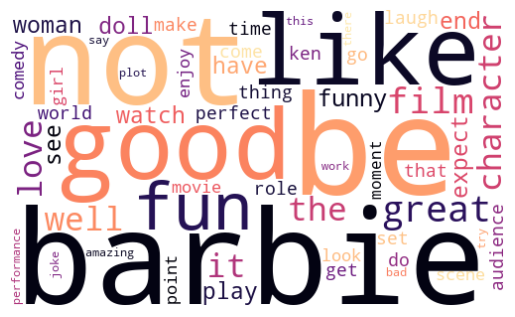

In [73]:
wc = WordCloud(width = 500, height = 300, background_color = "white", max_words = 55,
               colormap = "magma").generate_from_frequencies(tf_freq)


plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

In [74]:
tfidf=weights_df.sort_values(by='weight', ascending=False).head(55).set_index('term')['weight'].to_dict()

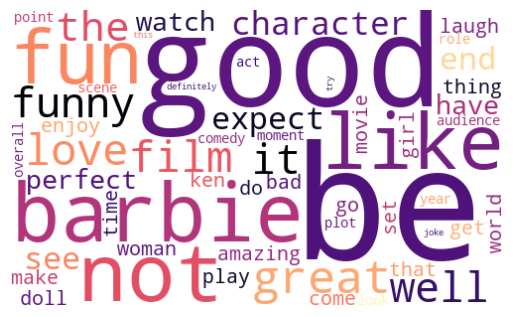

In [75]:
wc = WordCloud(width = 500, height = 300, background_color = "white", max_words = 55,
               colormap = "magma").generate_from_frequencies(tfidf)


plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

### Saving the clean data

In [76]:
text_clean = clean_content[['lemmatized','rating','tokens']]
text_clean.rename(columns={'lemmatized':'text'}, inplace=True)
text_clean

,text,rating,tokens
0,"beautiful film , preachy good she be give , di...",6,"[beautiful, film, ,, preachy, good, she, be, g..."
1,"guy discomfort , that be ok . pain call "" barb...",10,"[guy, discomfort, ,, that, be, ok, ., pain, ca..."
2,"come surprise . pain it , enjoy expect to , mu...",8,"[come, surprise, ., pain, it, ,, enjoy, expect..."
3,"great . nd half bring down . quality , humor ,...",6,"[great, ., nd, half, bring, down, ., quality, ..."
4,"weirdly fun movie ! ./ sure first , keep get f...",8,"[weirdly, fun, movie, !, ./, sure, first, ,, k..."
...,...,...,...
1019,good evening popcorn tv cinema waste money mar...,4,"[good, evening, popcorn, tv, cinema, waste, mo..."
1020,be not expect girl grow play barbie be not be ...,9,"[be, not, expect, girl, grow, play, barbie, be..."
1021,thoroughly enjoy love love love it.it 's funny...,8,"[thoroughly, enjoy, love, love, love, it.it, '..."
1022,"# justiceforken okay thoroughly enjoy funny , ...",8,"[#, justiceforken, okay, thoroughly, enjoy, fu..."


In [77]:
text_clean.to_csv('text_clean.csv')

## Text Classification

### Text classification based on BOW

Dividing data into test and training data:

In [78]:
from sklearn.model_selection import train_test_split
list_corpus = text_clean['text'].tolist()
list_labels = text_clean["rating"].tolist()

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2,
                                                                                random_state=0)

Finding document-term matrix:

In [79]:
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

Using logistic regression for classification:

In [80]:
from sklearn.linear_model import LogisticRegression

clf_bow = LogisticRegression(solver='newton-cg',
                         multi_class='multinomial', random_state=0)
clf_bow.fit(X_train_counts, y_train)

y_predicted_bow = clf_bow.predict(X_test_counts)

Testing the model:

In [81]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report


 # true positives / (true positives+false positives)
precision_bow = precision_score(y_test, y_predicted_bow, pos_label=None,
                                    average='weighted')
    # true positives / (true positives + false negatives)
recall_bow = recall_score(y_test, y_predicted_bow, pos_label=None,
                              average='weighted')

    # harmonic mean of precision and recall
f1_bow = f1_score(y_test, y_predicted_bow, pos_label=None, average='weighted')

    # true positives + true negatives/ total
accuracy_bow = accuracy_score(y_test, y_predicted_bow)

print("Klassifitseerimine BOW põhjal: accuracy = %.4f, precision = %.4f, recall = %.4f, f1 = %.4f" % (accuracy_bow, precision_bow, recall_bow, f1_bow))

Klassifitseerimine BOW põhjal: accuracy = 0.3465, precision = 0.3440, recall = 0.3465, f1 = 0.3103


In [82]:
print('Accuracy of classifier on test set: {:.4f}'
     .format(clf_bow.score(X_test_counts, y_test)))
print()
print(classification_report(y_test, y_predicted_bow, digits=4))

Accuracy of classifier on test set: 0.3465

              precision    recall  f1-score   support

           1     0.5000    0.3636    0.4211        11
           2     0.5000    0.1429    0.2222         7
           3     0.1000    0.0769    0.0870        13
           4     0.5000    0.1429    0.2222         7
           5     0.6000    0.1765    0.2727        17
           6     0.3158    0.3529    0.3333        17
           7     0.2903    0.4500    0.3529        20
           8     0.2000    0.1923    0.1961        26
           9     0.2308    0.0882    0.1277        34
          10     0.4253    0.7400    0.5401        50

    accuracy                         0.3465       202
   macro avg     0.3662    0.2726    0.2775       202
weighted avg     0.3440    0.3465    0.3103       202



Accuracy on test data is 33,2%. The accuracy is slightly better for very low and very high ratings.\
Frequency matrix for test data:

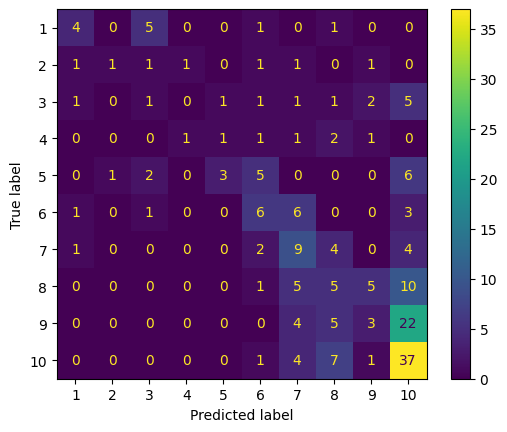

In [83]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
sorted_labels = sorted(text_clean["rating"].unique())
cm = confusion_matrix(y_test, y_predicted_bow, labels=sorted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted_labels)
disp.plot()
plt.show()

As we can see from the frequency matrix, the model predicts the best ratings (8-10) the best.\
Most important words:

In [84]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])

    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)

    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]

    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]

    fig = plt.figure(figsize=(10, 10))

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Irrelevant', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)

    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Relevant', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)

    plt.subplots_adjust(wspace=0.8)
    plt.show()

def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}

    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

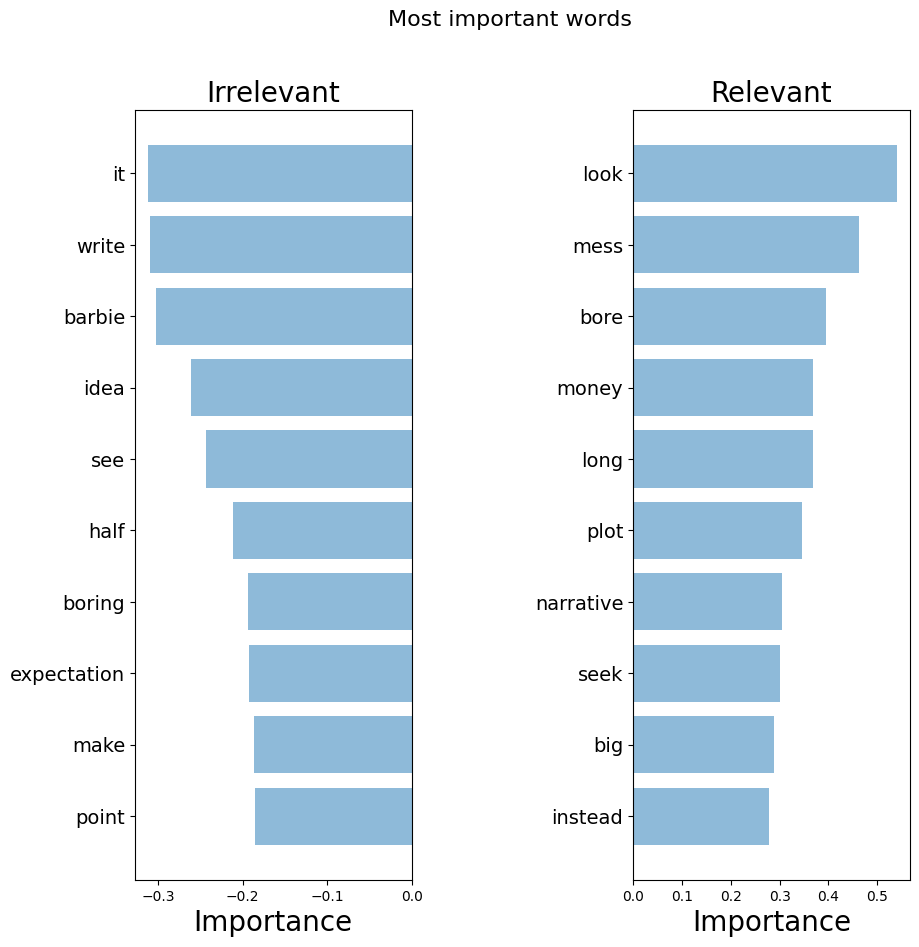

In [85]:
importance = get_most_important_features(vectorizer, clf_bow, 10)

top_scores = [a[0] for a in importance[1]['tops']]
top_words = [a[1] for a in importance[1]['tops']]
bottom_scores = [a[0] for a in importance[1]['bottom']]
bottom_words = [a[1] for a in importance[1]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words")

The mean accuracy of the this model (based on BOW) is 33.2%. The most important words are:

In [86]:
top_words

['instead',
 'big',
 'seek',
 'narrative',
 'plot',
 'long',
 'money',
 'bore',
 'mess',
 'look']

### Text classification based on TF-IDF method

Let's find the TF-IDF matrix for training and test data:

In [87]:
X_train_counts = transformer.fit_transform(X_train)
X_test_counts = transformer.transform(X_test)

Logistic regression for classification:

In [88]:
from sklearn.linear_model import LogisticRegression

clf_tfidf = LogisticRegression(solver='newton-cg',
                         multi_class='multinomial', random_state=0)
clf_tfidf.fit(X_train_counts, y_train)

y_predicted_tfidf= clf_tfidf.predict(X_test_counts)

Testing the model:

In [89]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

 # true positives / (true positives+false positives)
precision_tfidf = precision_score(y_test, y_predicted_tfidf, pos_label=None,
                                    average='weighted')
    # true positives / (true positives + false negatives)
recall_tfidf = recall_score(y_test, y_predicted_tfidf, pos_label=None,
                              average='weighted')

    # harmonic mean of precision and recall
f1_tfidf = f1_score(y_test, y_predicted_tfidf, pos_label=None, average='weighted')

    # true positives + true negatives/ total
accuracy_tfidf = accuracy_score(y_test, y_predicted_tfidf)

print("Klassifitseerimine TF-IDF meetodi põhjal: accuracy = %.4f, precision = %.4f, recall = %.4f, f1 = %.4f" % (accuracy_tfidf, precision_tfidf, recall_tfidf, f1_tfidf))

print('Accuracy of classifier on test set: {:.4f}'
     .format(clf_tfidf.score(X_test_counts, y_test)))
print()
print(classification_report(y_test, y_predicted_tfidf, digits=2))

Klassifitseerimine TF-IDF meetodi põhjal: accuracy = 0.2822, precision = 0.1343, recall = 0.2822, f1 = 0.1692
Accuracy of classifier on test set: 0.2822

              precision    recall  f1-score   support

           1       0.00      0.00      0.00        11
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00        17
           6       0.06      0.06      0.06        17
           7       0.31      0.25      0.28        20
           8       0.14      0.12      0.12        26
           9       0.00      0.00      0.00        34
          10       0.33      0.96      0.49        50

    accuracy                           0.28       202
   macro avg       0.08      0.14      0.09       202
weighted avg       0.13      0.28      0.17       202



c:\Users\meeli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\meeli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\meeli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

Accuracy on test data is 27.2%, which is worse than the classification based on BOW.\
Frequency matrix:

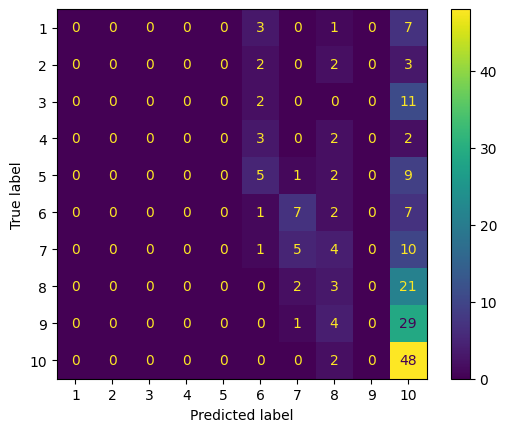

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
sorted_labels = sorted(text_clean["rating"].unique())
cm = confusion_matrix(y_test, y_predicted_tfidf, labels=sorted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted_labels)
disp.plot()
plt.show()

As we can see from the frequency matrix, the model mainly predicts very positive (10/10) ratings.\
The most important words:

In [91]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])

    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)

    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]

    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]

    fig = plt.figure(figsize=(10, 10))

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Irrelevant', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)

    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Relevant', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)

    plt.subplots_adjust(wspace=0.8)
    plt.show()

def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}

    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

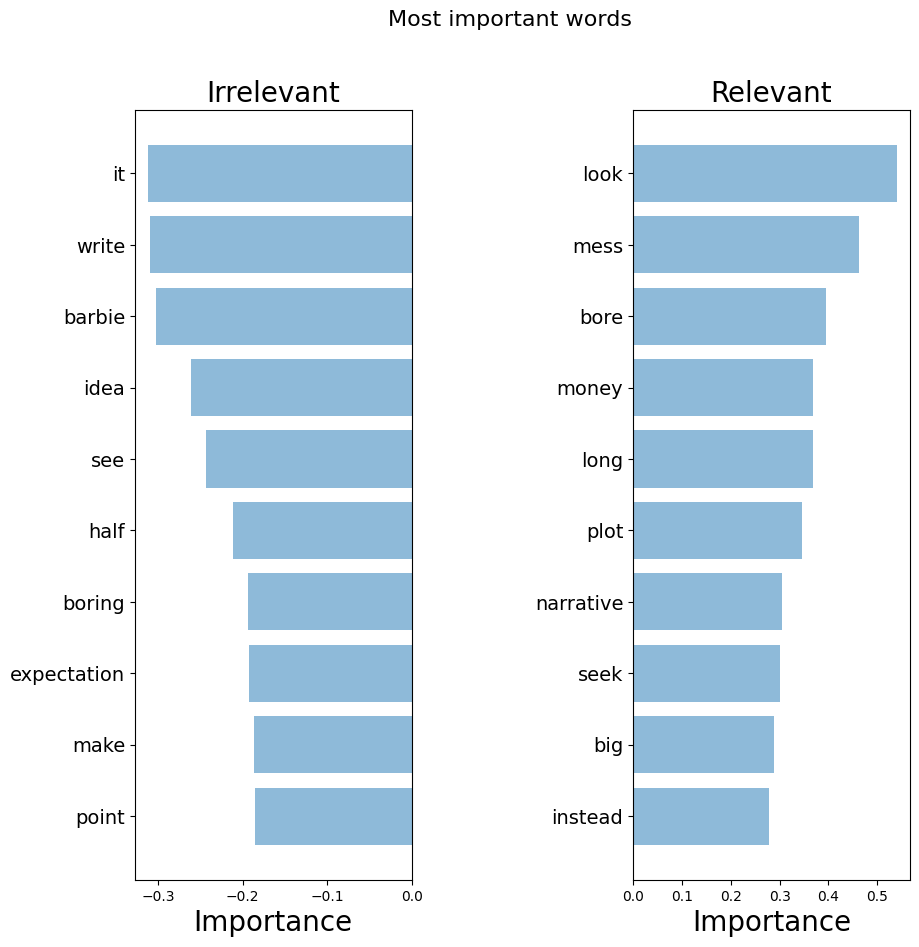

In [92]:
importance = get_most_important_features(transformer, clf_bow, 10)

top_scores = [a[0] for a in importance[1]['tops']]
top_words = [a[1] for a in importance[1]['tops']]
bottom_scores = [a[0] for a in importance[1]['bottom']]
bottom_words = [a[1] for a in importance[1]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words")

Top words for ratings are:

In [93]:
top_words

['instead',
 'big',
 'seek',
 'narrative',
 'plot',
 'long',
 'money',
 'bore',
 'mess',
 'look']

BOW method was better for classification, although both methods gave relatively poor results.

## Sentiment Analysis

I'm using VADER method for sentiment analysis. VADER is a sentiment scoring method specifically developed for analyzing social media texts. VADER is an acronym for Valence Aware Dictionary and sEntiment Reasoner. VADER is built into the NLTK package.

In [94]:
import nltk
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\meeli\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [95]:
def get_pos(text):

    scores = analyzer.polarity_scores(text)

    return scores['pos']

def get_neg(text):

    scores = analyzer.polarity_scores(text)

    return scores['neg']

def get_neu(text):

    scores = analyzer.polarity_scores(text)

    return scores['neu']

In [96]:
text_clean['neg'] = text_clean['text'].apply(get_neg)
text_clean['pos'] = text_clean['text'].apply(get_pos)
text_clean['neu'] = text_clean['text'].apply(get_neu)

text_clean

,text,rating,tokens,neg,pos,neu
0,"beautiful film , preachy good she be give , di...",6,"[beautiful, film, ,, preachy, good, she, be, g...",0.17500,0.35300,0.47200
1,"guy discomfort , that be ok . pain call "" barb...",10,"[guy, discomfort, ,, that, be, ok, ., pain, ca...",0.14300,0.34700,0.51000
2,"come surprise . pain it , enjoy expect to , mu...",8,"[come, surprise, ., pain, it, ,, enjoy, expect...",0.07400,0.49900,0.42700
3,"great . nd half bring down . quality , humor ,...",6,"[great, ., nd, half, bring, down, ., quality, ...",0.06200,0.42100,0.51700
4,"weirdly fun movie ! ./ sure first , keep get f...",8,"[weirdly, fun, movie, !, ./, sure, first, ,, k...",0.06900,0.54300,0.38700
...,...,...,...,...,...,...
1019,good evening popcorn tv cinema waste money mar...,4,"[good, evening, popcorn, tv, cinema, waste, mo...",0.27000,0.37700,0.35200
1020,be not expect girl grow play barbie be not be ...,9,"[be, not, expect, girl, grow, play, barbie, be...",0.07300,0.43600,0.49100
1021,thoroughly enjoy love love love it.it 's funny...,8,"[thoroughly, enjoy, love, love, love, it.it, '...",0.04700,0.52200,0.43000
1022,"# justiceforken okay thoroughly enjoy funny , ...",8,"[#, justiceforken, okay, thoroughly, enjoy, fu...",0.16800,0.48600,0.34600


Text polarity:

In [97]:
text_clean['polarity']=text_clean[['pos','neg','neu']].idxmax(axis=1)
text_clean

,text,rating,tokens,neg,pos,neu,polarity
0,"beautiful film , preachy good she be give , di...",6,"[beautiful, film, ,, preachy, good, she, be, g...",0.17500,0.35300,0.47200,neu
1,"guy discomfort , that be ok . pain call "" barb...",10,"[guy, discomfort, ,, that, be, ok, ., pain, ca...",0.14300,0.34700,0.51000,neu
2,"come surprise . pain it , enjoy expect to , mu...",8,"[come, surprise, ., pain, it, ,, enjoy, expect...",0.07400,0.49900,0.42700,pos
3,"great . nd half bring down . quality , humor ,...",6,"[great, ., nd, half, bring, down, ., quality, ...",0.06200,0.42100,0.51700,neu
4,"weirdly fun movie ! ./ sure first , keep get f...",8,"[weirdly, fun, movie, !, ./, sure, first, ,, k...",0.06900,0.54300,0.38700,pos
...,...,...,...,...,...,...,...
1019,good evening popcorn tv cinema waste money mar...,4,"[good, evening, popcorn, tv, cinema, waste, mo...",0.27000,0.37700,0.35200,pos
1020,be not expect girl grow play barbie be not be ...,9,"[be, not, expect, girl, grow, play, barbie, be...",0.07300,0.43600,0.49100,neu
1021,thoroughly enjoy love love love it.it 's funny...,8,"[thoroughly, enjoy, love, love, love, it.it, '...",0.04700,0.52200,0.43000,pos
1022,"# justiceforken okay thoroughly enjoy funny , ...",8,"[#, justiceforken, okay, thoroughly, enjoy, fu...",0.16800,0.48600,0.34600,pos


In [98]:
text_clean['index'] = text_clean.index

C:\Users\meeli\AppData\Local\Temp\ipykernel_6908\2988081453.py:6: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


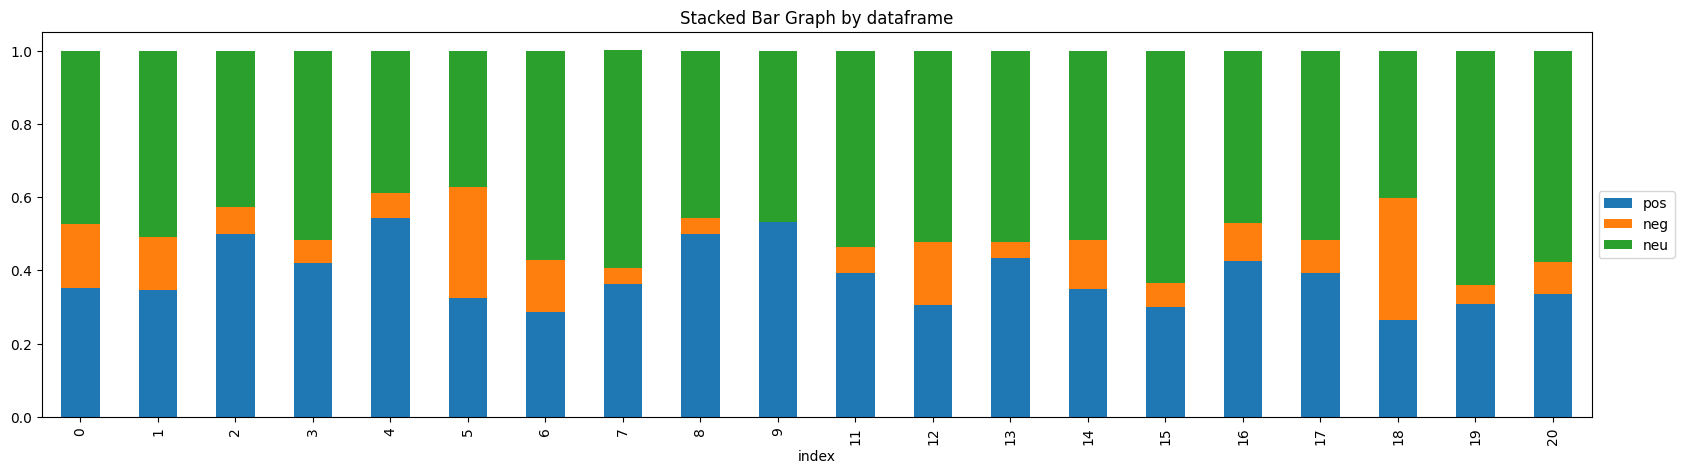

In [99]:
import matplotlib.pyplot as plt
#plt.figure(figsize=(500,15))
text_clean[['index','pos','neg','neu']].iloc[:20].plot(x='index', kind='bar', stacked=True,figsize=(20,5),
        title='Stacked Bar Graph by dataframe').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

fig.tight_layout()
plt.show()

The polarity of the first 20 messages is mostly positive or neutral. There is little negativity. Polarity of all messages:

C:\Users\meeli\AppData\Local\Temp\ipykernel_6908\692115889.py:6: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


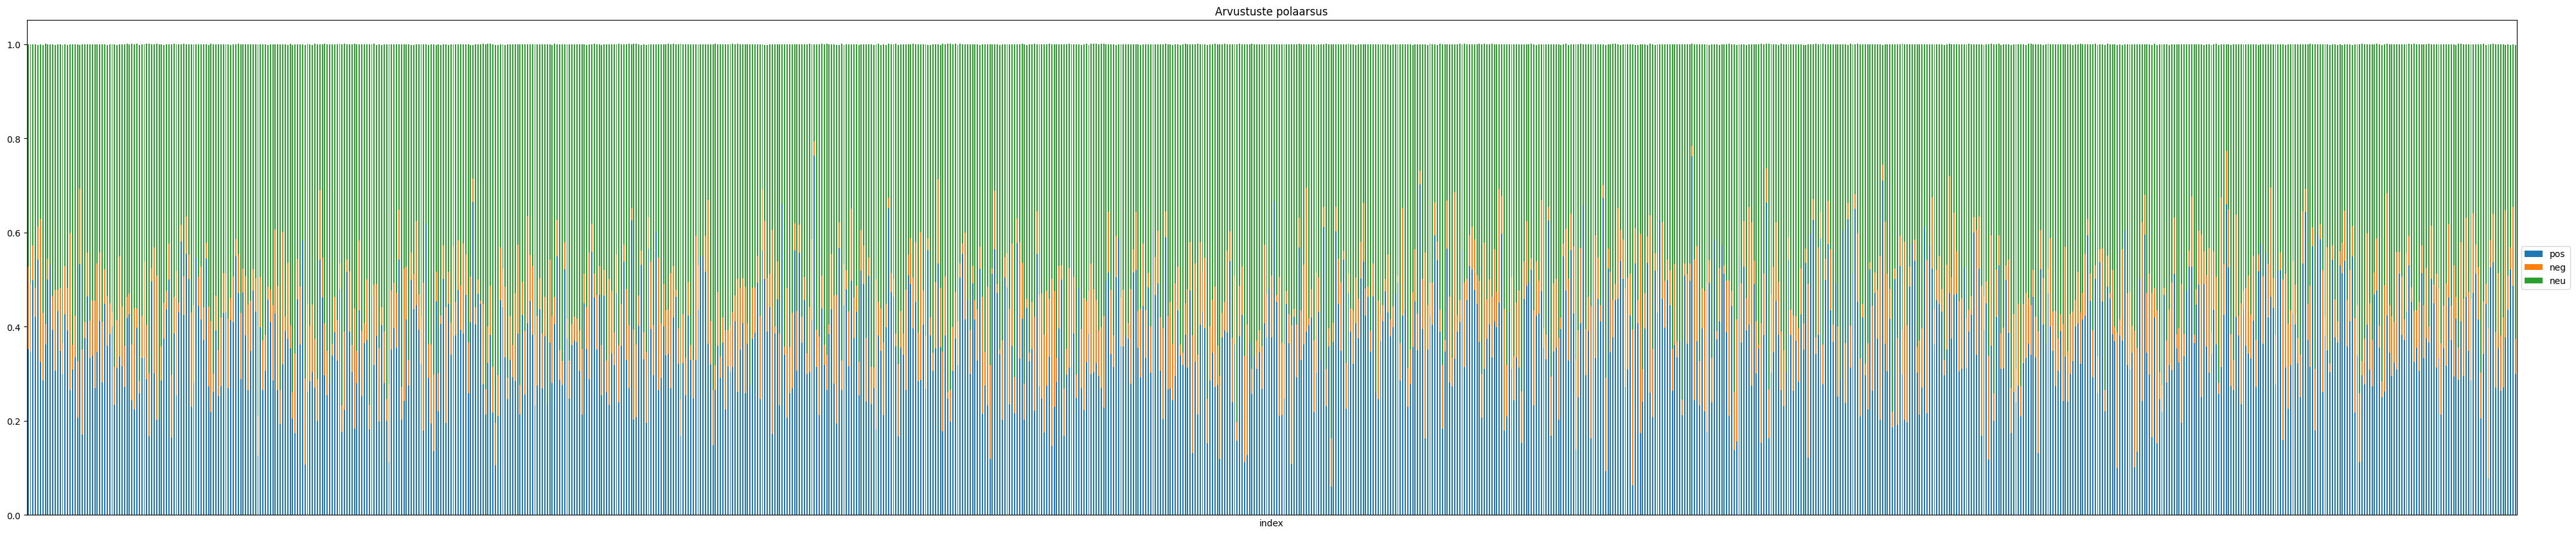

In [100]:
import matplotlib.pyplot as plt
text_clean[['index','pos','neg','neu']].plot(x='index', kind='bar', stacked=True,figsize=(50,10),
        title='Arvustuste polaarsus').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

plt.xticks([])
fig.tight_layout()
plt.show()

C:\Users\meeli\AppData\Local\Temp\ipykernel_6908\4026638294.py:4: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


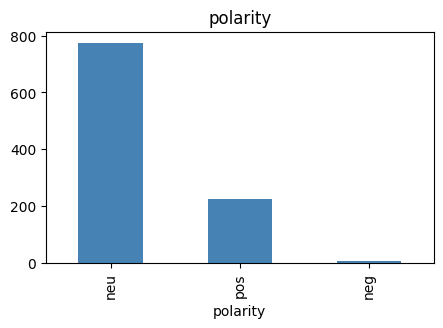

In [101]:
import matplotlib.pyplot as plt
text_clean["polarity"].value_counts().plot(kind='bar', title="polarity", color="steelblue",figsize=(5,3))

fig.tight_layout()
plt.show()

The polarity of all messages is mostly neutral (the most frequently) or positive. There is little negativity. This can also be seen within the distribution of the ratings, which is illustrated once again below. Based on the distribution, positive polarity should be more ferquent. Then again, there could be differences in the review content and the rating given. For example, the review consists of neutral words, but the given rating is high.

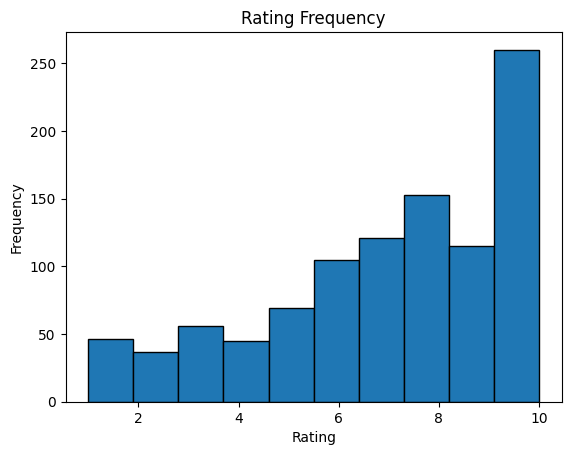

In [102]:
import matplotlib.pyplot as plt

text_clean['rating'].plot(kind='hist',bins = 10, edgecolor='black')
plt.title('Rating Frequency')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [103]:
text_clean["polarity"].value_counts(normalize=True).mul(100).round(2)

polarity
neu   77.06000
pos   22.34000
neg    0.60000
Name: proportion, dtype: float64

Based on the sentiment analysis, 66.1% of the reviews are neutral, 33.0% are positive and 0.9% are negative.

## Conclusion

In conclusion, the reviews in the dataset are mostly neutral or positive, although the corresponding ratings are mostly positive. This can be explained by the fact that many reviews may be conveyed in a rather neutral wording and contain few words that express excessive positivity. Classification of the reviews' wording does not work very well, but choosing between two different methods, classification based on BOW would probably work better. Classification could also be improved by trying not to classify the exact rating, but rather some rating range or dividing the ratings into some groups (good/average/bad).